### In this notebook I'm trying to detect faces using OpenCV library
##### - when faces are fully visible
##### - when mouths are covered

- About OpenCV: https://docs.opencv.org/3.2.0/index.html
- OpenCV documentation: https://docs.opencv.org/2.4/index.html

In [1]:
%matplotlib inline

import cv2 
import math
import numpy as np
import matplotlib.pyplot as plt

[]

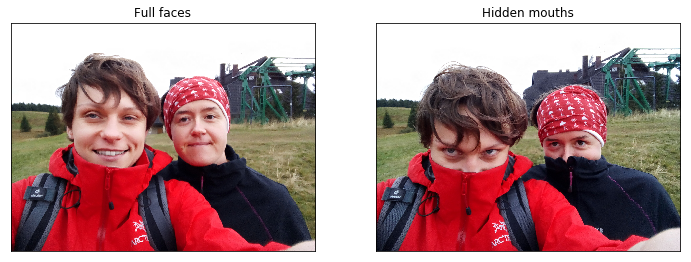

In [2]:
# Loading two pictures
image_full_faces = cv2.imread('images/full_faces.jpg')
image_hidden_mouths = cv2.imread('images/hidden_faces.jpg')


# Converting colors
image_full_faces = cv2.cvtColor(image_full_faces, cv2.COLOR_BGR2RGB)
image_hidden_mouths = cv2.cvtColor(image_hidden_mouths, cv2.COLOR_BGR2RGB)


# Two subplots, the axes array is 1-d
f, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(image_full_faces);
ax[1].imshow(image_hidden_mouths);
ax[0].set_title('Full faces')
ax[1].set_title('Hidden mouths')
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[0].set_yticks([])
ax[1].set_yticks([])

#### Detect us!

Faces detected in 'full_faceces' picture: 2
Faces detected in 'hidden_mouths' picture: 0


[]

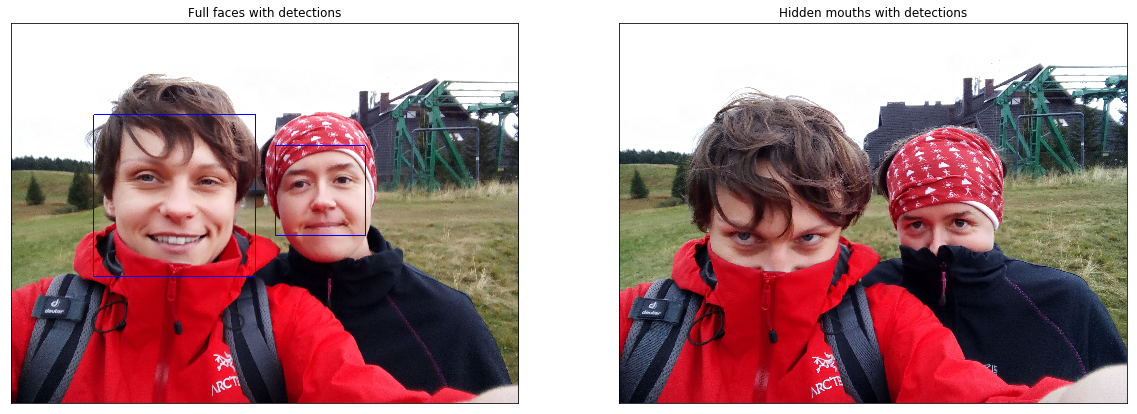

In [61]:
# Converting to grayscale
gray_full_faces = cv2.cvtColor(image_full_faces, cv2.COLOR_RGB2GRAY)
gray_hidden_mouths = cv2.cvtColor(image_hidden_mouths, cv2.COLOR_RGB2GRAY)

# Get pretrained architecture
face_cascade = cv2.CascadeClassifier('opencv_architectures/haarcascade_frontalface_default.xml')

# Detect!
# scaleFactor - face size
# minNeighbors - the higher value the less detections but with higher value
# minSize
faces_full_faces = face_cascade.detectMultiScale(gray_full_faces, scaleFactor=1.8, minNeighbors=1, minSize=(150,150))
faces_hidden_mouths = face_cascade.detectMultiScale(gray_hidden_mouths, scaleFactor=1.8, minNeighbors=1, minSize=(150,150))

print('Faces detected in \'full_faceces\' picture:', len(faces_full_faces))
print('Faces detected in \'hidden_mouths\' picture:', len(faces_hidden_mouths))

# Copy images to draw squares 
image_full_faces_with_detections = np.copy(image_full_faces)
image_hidden_mouths_with_detections = np.copy(image_hidden_mouths)

# Draw blue box around found faces
for (x,y,w,h) in faces_full_faces:
    cv2.rectangle(image_full_faces_with_detections, (x,y), (x+w,y+h), (0,0,255), 3)
    
for (x,y,w,h) in faces_hidden_mouths:
    cv2.rectangle(image_hidden_mouths_with_detections, (x,y), (x+w,y+h), (0,0,255), 3)


# Two subplots, the axes array is 1-d
f, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(image_full_faces_with_detections);
ax[1].imshow(image_hidden_mouths_with_detections);
ax[0].set_title('Full faces with detections')
ax[1].set_title('Hidden mouths with detections')
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[0].set_yticks([])
ax[1].set_yticks([])

#### Face detector doesn't detect faces with hidden mouths. We can try out eye detector though!

OpenCV architectures:
    https://github.com/opencv/opencv/tree/master/data/haarcascades

Eyes detected in 'full_faceces' picture: 5
Eyes detected in 'hidden_mouths' picture: 4


[]

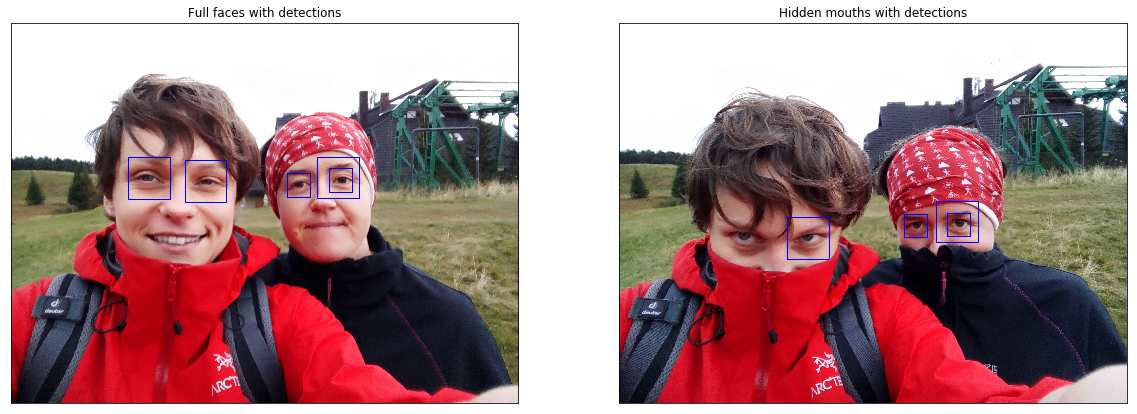

In [84]:
cascade_eye = cv2.CascadeClassifier('opencv_architectures/haarcascade_eye.xml')

eyes_full_faces = cascade_eye.detectMultiScale(gray_full_faces, scaleFactor=1.8, minNeighbors=2, minSize=(90,90), maxSize=(400,400))
eyes_hidden_mouths = cascade_eye.detectMultiScale(gray_hidden_mouths, scaleFactor=1.8, minNeighbors=2, minSize=(90,90), maxSize=(400,400))


# Copy images to draw squares
image_full_faces_with_detections_eyes = np.copy(image_full_faces)
image_hidden_mouths_with_detections_eyes = np.copy(image_hidden_mouths)

# Draw blue box around found faces
for (x,y,w,h) in eyes_full_faces:
    cv2.rectangle(image_full_faces_with_detections_eyes, (x,y), (x+w,y+h), (0,0,255), 3)
    
for (x,y,w,h) in eyes_hidden_mouths:
    cv2.rectangle(image_hidden_mouths_with_detections_eyes, (x,y), (x+w,y+h), (0,0,255), 3)


print('Eyes detected in \'full_faceces\' picture:', len(eyes_full_faces))
print('Eyes detected in \'hidden_mouths\' picture:', len(eyes_hidden_mouths))
    
# Two subplots, the axes array is 1-d
f, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(image_full_faces_with_detections_eyes);
ax[1].imshow(image_hidden_mouths_with_detections_eyes);
ax[0].set_title('Full faces with detections')
ax[1].set_title('Hidden mouths with detections')
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[0].set_yticks([])
ax[1].set_yticks([])